In [163]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.available
plt.style.use('seaborn-whitegrid')

pd.set_option('display.max_rows', 500)
relativePathImages = '../latex/src/images/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


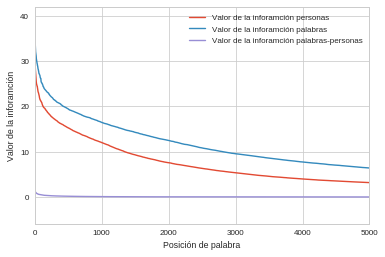

In [164]:
df = pd.read_csv('ivalue_entropia_personas_palabras.csv',index_col=0)
df2 = df.sort_values(by="information_value_personas", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas.plot(xlim=[0,5000])
df2 = df.sort_values(by="information_value_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_palabras.plot(xlim=[0,5000])

df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(xlim=[0,5000])
ax2.legend([u'Valor de la inforamción personas',u'Valor de la inforamción palabras',u'Valor de la inforamción palabras-personas'])


ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')

ax= ax2.get_figure()
ax.savefig("ivalues.svg",dpi=300)

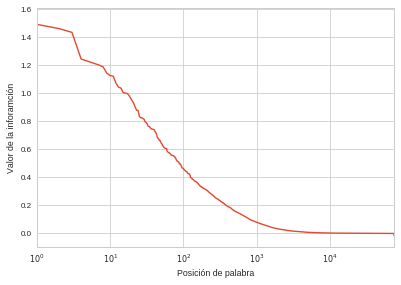

In [471]:
df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(logx=True)
ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')
ax= ax2.get_figure()
ax.savefig("{0}ivaluesLog.pdf".format(relativePathImages),dpi=300)

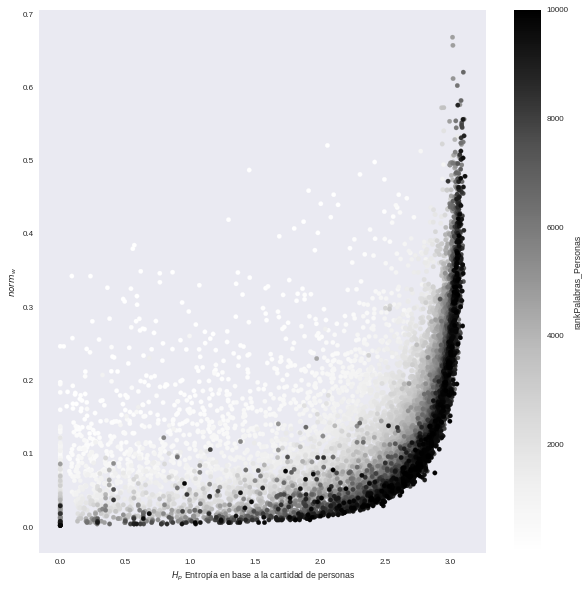

In [150]:
sns.set_style("dark")
ax = df.iloc[:10000].plot.scatter(x='entropy_personas',y='normCantPalabras',c='rankPalabras_Personas',sharex=False,figsize=(10,10))
ax.set_ylabel(u'$norm_w$')
ax.set_xlabel(u'$H_p$ Entropía en base a la cantidad de personas')

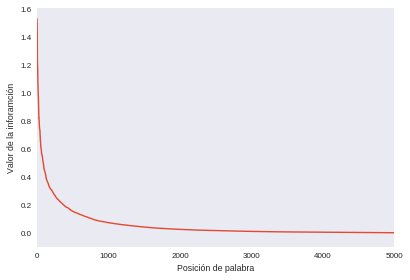

In [151]:
df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(xlim=[0,5000])


ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')

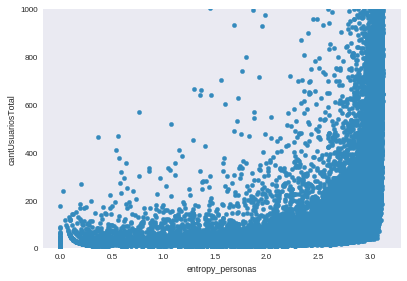

In [152]:
df.plot.scatter(x="entropy_personas", y="cantUsuariosTotal", ylim=[0, 1000])

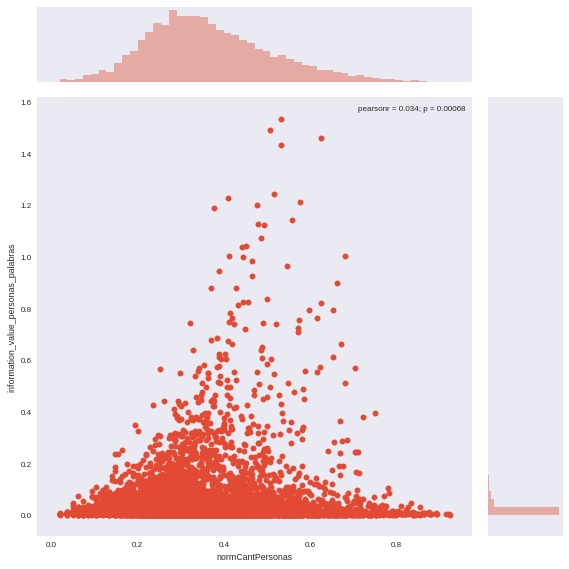

In [153]:
sns.set_context('paper')
sns.jointplot(kind='scatter',x="normCantPersonas", y="information_value_personas_palabras",data=df.iloc[:10000],size=8)

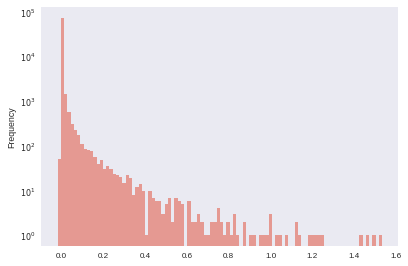

In [154]:
df.information_value_personas_palabras.plot(kind='hist',bins=100,logy=True,alpha=0.5)

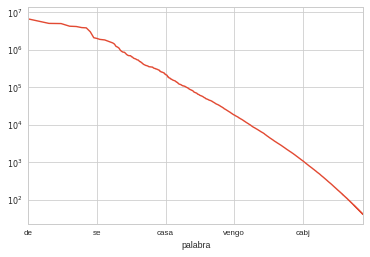

In [401]:
ax = df.cantPalabra.sort_values(ascending=False).plot(y='cantPalabra',x=range(len(df.cantPalabra)),logy=True,logx=True)
ax.set_xlabel= range(len(df.cantPalabra))


In [423]:
df['Rank'] = df['cantPalabra'].rank(method = 'min', ascending = False)
x = range(len(df.cantPalabra))
x = np.log(df['Rank'])
y = np.log(df['cantPalabra'])
fit = np.polyfit(x, y, deg = 1)
fitted = fit[0] * x + fit[1]
print 'Valor estimado de s:\n{0}'.format(fit[0])

Valor estimado de s:
-1.45242883879


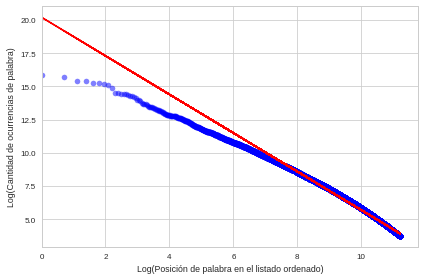

In [425]:
fig = plt.Figure(figsize = (4,4), facecolor = 'w', edgecolor = 'w')
ax = plt.subplot(111)

ax.plot(x, y, 'bo', alpha = 0.5)
ax.plot(x,fitted,'r')
# ax.set_xscale("log", nonposx='clip')
# ax.set_yscale("log", nonposy='clip')


ax.set_xlabel(u'Log(Posición de palabra en el listado ordenado)')
ax.set_ylabel(u'Log(Cantidad de ocurrencias de palabra)')

ax.set_xlim(left = max([min(np.log(df['Rank'])) * 0.95,0]))

ax.get_figure().savefig("{0}zipf.pdf".format(relativePathImages),dpi=300)
plt.tight_layout()
plt.show()


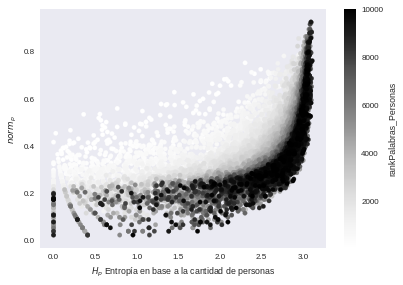

In [156]:
ax = df.iloc[:10000].plot(kind='scatter',x='entropy_personas',y='normCantPersonas',c='rankPalabras_Personas',sharex=False)
ax.set_xlabel(u'$H_p$ Entropía en base a la cantidad de personas')
ax.set_ylabel(r'$norm_p$')
ax2= ax.get_figure()
ax2.savefig("{0}entropiaPersonasxNormCantPersonas.pdf".format(relativePathImages),dpi=300)


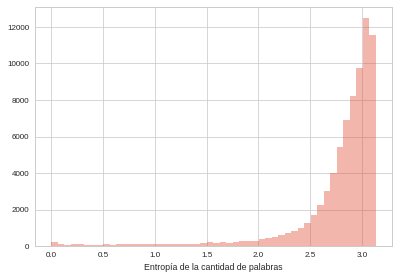

In [473]:
ax = sns.distplot(a=df.entropy_palabras,hist=True,kde=False,axlabel=u'Entropía de la cantidad de palabras')
ax2= ax.get_figure()
ax2.savefig("{0}DistribucionEntropia.pdf".format(relativePathImages),dpi=300)

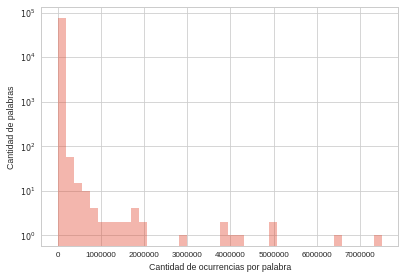

In [464]:
ax = sns.distplot(a=df.cantPalabra,hist=True,bins=40,kde=False)
ax.set_yscale('log')
ax.set_xlabel('Cantidad de ocurrencias por palabra')
ax.set_ylabel('Cantidad de palabras')
ax2 = ax.get_figure()
ax2.savefig("{0}DistribucionOcurrenciasPalabras.pdf".format(relativePathImages),dpi=300)

In [431]:
df.cantPalabra.max()

7509160

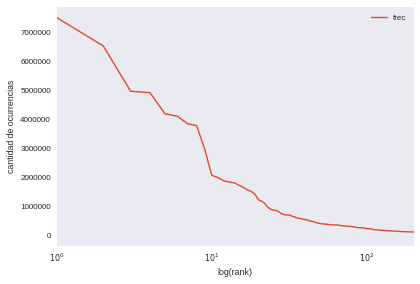

In [159]:
cants = pd.DataFrame(df.cantPalabra)
cantTotal = sum(cants.cantPalabra)
cants = cants.sort_values(by='cantPalabra',ascending=False)
cants['frec'] = cants.cantPalabra
cants['rank'] = cants.cantPalabra.rank(ascending=False)
ax = cants.plot(x='rank',y='frec',logx=True,logy=False,xlim=(0,200))
ax.set_xlabel('log(rank)')
ax.set_ylabel('cantidad de ocurrencias')


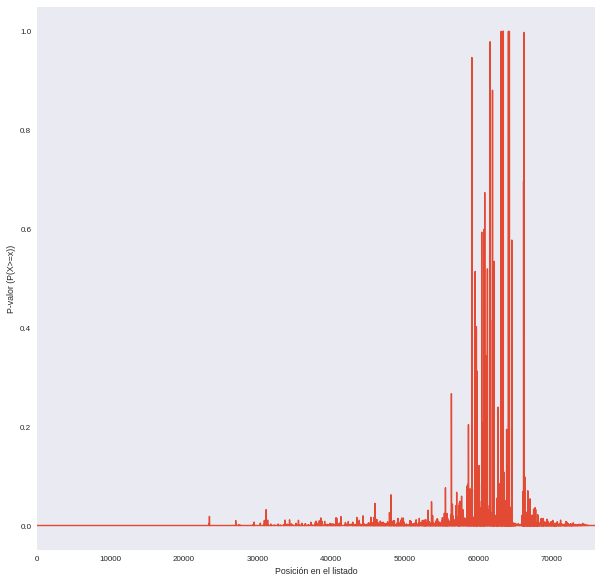

In [160]:
pvalores = pd.read_csv('../pvalores.csv')
f = pvalores.dropna().pvalor.plot(figsize=(10,10))
f.set_xlabel(u'Posición en el listado')
f.set_ylabel(u'P-valor (P(X>=x))')

f.get_figure().savefig('pvalores.png')

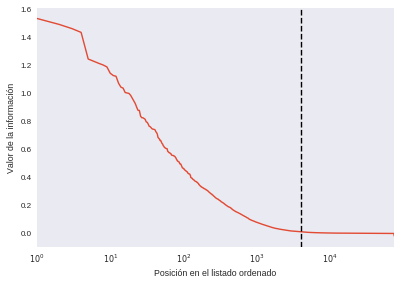

In [161]:
ax=df.plot(x='rankPalabras_Personas',y='information_value_personas_palabras',logx=True,legend=False)
ax.axvline(4000, linestyle='--', color='k')
ax.set_xlabel(u'Posición en el listado ordenado')
ax.set_ylabel(u'Valor de la información')
ax.get_figure().savefig("{0}valorInformacionCorte".format(relativePathImages),dpi=300)

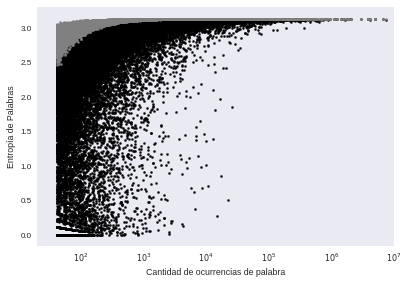

In [162]:

df2 = pd.DataFrame()
df2['x'] = df.cantPalabra
df2['y'] = df.entropy_palabras
ax = df2.plot(kind='scatter',x='x',y='y',s=5,color='black',logx=True,xlim=((20,10**7)))

df3 = pd.DataFrame()
df3['x'] = df.cantPalabra
df3['y'] = df.shuffled_entropy_palabras
df3.plot(kind='scatter',x='x',y='y',s=5,color='gray',logx=True,ax= ax)
ax.set_xlabel(u'Cantidad de ocurrencias de palabra')
ax.set_ylabel(u'Entropía de Palabras')



In [343]:
from apps import argentina
import csv
provincias = argentina.keys()

times = pd.DataFrame()
for prov in provincias:
    dfT = pd.read_csv('../csv/train_{0}.csv'.format(prov),encoding='utf-8',delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    times[prov] = pd.to_datetime(dfT['tweet_created_at'])
#     print len(dfT)

In [389]:
dfT.columns

Index([u'tweet_created_at', u'text', u'tweet_id', u'user_id', u'screen_name',
       u'friends', u'followers', u'statuses_count', u'favorites',
       u'geo_enabled', u'created_at', u'location'],
      dtype='object')

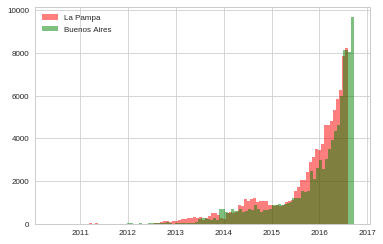

In [346]:
ax = times.lapampa.hist(bins=100,alpha=0.5,color='red',label = 'La Pampa',stacked=True)
times.cordoba.hist(bins=100,ax=ax,color='green',alpha=0.5,label='Buenos Aires',stacked=True)
# times.tierradelfuego.hist(bins=100,ax=ax,color='blue',alpha=0.3,label='Cordoba',stacked=True)
ax.legend()
ax.get_figure().savefig("{0}histTweetsProvincia1.pdf".format(relativePathImages),dpi=300)


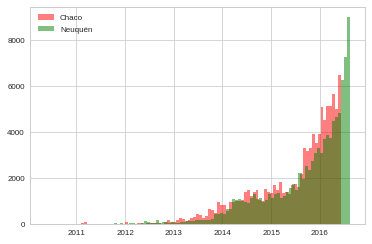

In [347]:
ax = times.chaco.hist(bins=100,alpha=0.5,color='red',label = 'Chaco')
times.neuquen.hist(bins=100,ax=ax,color='green',alpha=0.5,label=u'Neuquén')
# times.tierradelfuego.hist(bins=100,ax=ax,color='blue',alpha=0.3,label='Cordoba',stacked=True)
ax.legend()
ax.get_figure().savefig("{0}histTweetsProvincia2.pdf".format(relativePathImages),dpi=300)


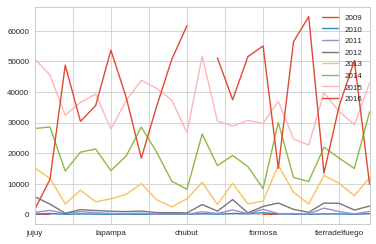

In [335]:
times2 = pd.DataFrame()
for p in provincias:
    times2[p] = times[p].groupby(times[p].dt.year).count()

ax = times2.T.plot(kind='line')
ax.set_label([2010,2016])
ax.legend()

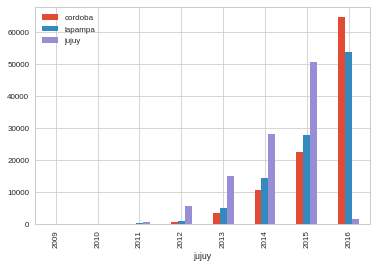

In [322]:
times2[['cordoba','lapampa','jujuy']].plot.bar()

In [377]:
df1 = pd.read_csv('../csv/train_buenosaires.csv', encoding='utf-8', quotechar='|', quoting=csv.QUOTE_MINIMAL)
df2 = pd.read_csv('../csv/train_chaco.csv', encoding='utf-8', quotechar='|', quoting=csv.QUOTE_MINIMAL)
df3 = pd.read_csv('../csv/train_jujuy.csv', encoding='utf-8', quotechar='|', quoting=csv.QUOTE_MINIMAL)
df4 = pd.read_csv('../csv/train_lapampa.csv', encoding='utf-8', quotechar='|', quoting=csv.QUOTE_MINIMAL)
df5 = pd.concat([df1, df2, df3,df4], keys=["bsas", "chaco", "jujuy","lapampa"])

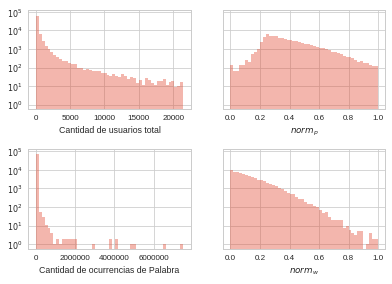

In [470]:
sns.set_context('paper')
fig, axes = plt.subplots(ncols=2,nrows=2,sharey=True)
sns.distplot(df.cantUsuariosTotal,kde=False,ax=axes[0,0])
sns.distplot(df.normCantPersonas,kde=False,ax=axes[0,1])
sns.distplot(a=df.cantPalabra,kde=False,ax=axes[1,0])
sns.distplot(df.normCantPalabras,kde=False,ax=axes[1,1])
fig.subplots_adjust(hspace=.4)
# axes[0,0].set(xlabel='Cantidad de ocurrencias', ylabel='')
replacements = {'cantUsuariosTotal': 'Cantidad de usuarios total', 'normCantPersonas': r'$norm_p$',
                'cantPalabra': 'Cantidad de ocurrencias de Palabra', 'normCantPalabras': r'$norm_w$'}

# axes[0,0].set_xlim(0,4000)
# axes[1,0].set_xlim(0,200000)
axes[0,0].set_yscale('log')

axes[1,0].set_yscale('log')

for i in range(2):
    for j in range(2):
        xlabel = axes[i][j].get_xlabel()
        ylabel = axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            axes[i][j].set_ylabel(replacements[ylabel])
fig.savefig("{0}cantNorms.pdf".format(relativePathImages),dpi=300)